# DATA 601: HW4

**Learning Objectives**

- Work with realworld datasets that can be represented using tabular data structures.
- Gain experience wrangling and organizing data using `pandas`.
- Produce visualizations summarizing information from tabular data.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment, and provide your answers where indicated.

#### Submission 

Your submission will be manually tested and graded. In order to ensure that everything goes smoothly, please ensure that: 

- your notebook runs on the Data Science Hub environment, 
- you have provided your solutions where asked without altering any other parts of this notebook,

_You do not need to submit the datasets provided for this homework._


## Dataset

In this homework, you will be working with a building utility usage dataset that contains usage data for six buildings at the University of Calgary over a period of three years. The data has been made available by the [Office of Sunstainability](https://www.ucalgary.ca/sustainability/campus-learning-lab) at the University of Calgary specifically for use in DATA 601. 

_Please do not share the data with anyone in any form_.

The original data is in excel format and contains a hierarchical index. For this assignment, you will be working with a slightly modified version where the building names have been anonymized and the hierarchical index has been flattended into a [tidy format](https://r4ds.had.co.nz/tidy-data.html). The resulting dataset is available on D2L in CSV format.

<!-- BEGIN QUESTION -->

## TASK 0

### Read the Dataset

- Please ensure that the data is available to you locally on the machine you are working on. 
- Read the data using `pandas`, display the head and tail of the data and familiarize yourself with the variables contained in the dataset. 

In [12]:
# Use this cell to collect package imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime

In [13]:
# Read the data into a pandas dataframe and display the head and tail
data = pd.read_csv("Building Data.csv")
data.head()
data.tail()

,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh)
6571,2021-09-30,B2,NaN,"6,031.40",33.3,"25,053.89","9,341.67",NaN,5.56
6572,2021-09-30,B3,"27,630.74",NaN,23.1,"4,035.63",NaN,"4,536.11",0
6573,2021-09-30,B4,"5,049.75",NaN,1.3,"5,308.12",NaN,"6,591.68",0
6574,2021-09-30,B5,"1,310.03",NaN,26.18,"2,111.07",NaN,988.89,0
6575,2021-09-30,B6,"1,523.97",NaN,1.0,"3,263.78",NaN,0,0.0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 1

### Data Wrangling

At this stage, it might be helpful to do some data cleaning and wrangling to facilitate the tasks below. 

- Ensure that the numerical values are read in properly. If not, please use an appropiate numerical type to represent columns that contain numerical quantities.
- The `Date` column contains year, month and day information that needs to be parsed as such so that the data can be inspected at yearly, monthly and daily granularities. There are multiple ways of doing this; one way is to separate the year, month and day out into separate columns. You can also build a hierarchical row index with year, month and day as different levels of the index. 
 
 You may find [`pandas.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) helpful for this task.
 Please also have a look at the documentation for [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Some helpful type conversions and cleanup can be performed by pandas at the data read stage.

In [14]:
# Use this cell to do any data type conversions. Alternatively, you may want to pass in appropriate 
# arguments when reading in data above to ensure that the types are inferred correctly.

#Remove all "," in numbers to avoid any errors
for i in list(data.columns.values)[2:]:
    data[i] = data[i].str.replace(',', '')

for i in list(data.columns.values)[2:]:
    data[i] = pd.to_numeric(data[i])

# Do any conversions needed and then print out the `dtypes` for the non-date columns. 
for i in list(data.columns.values)[2:]:
    print(i, ": ", data[i].dtype)

Chilled Water (kWh) :  float64
Cooling (kWh) :  float64
Domestic Cold Water (m3) :  float64
Electricity (kWh) :  float64
Heating (kWh) :  float64
Heating Water (kWh) :  float64
Natural Gas (kWh) :  float64


In [15]:
# Use this cell to do any wrangling on the date column. Then display the resulting dataframe
data["Date"] = pd.to_datetime(data["Date"])
data["Day"] = data["Date"].dt.day
data["Month"] = data["Date"].dt.month
data["Year"] = data["Date"].dt.year
data.head()

,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh),Day,Month,Year
0,2018-10-01,B1,NaN,4920.66,6.39,13240.10,16244.46,NaN,1319.45,1,10,2018
1,2018-10-01,B2,NaN,4258.32,89.69,13846.41,50505.60,NaN,2427.78,1,10,2018
2,2018-10-01,B3,0.00,NaN,70.10,7181.70,NaN,12147.23,0.00,1,10,2018
3,2018-10-01,B4,0.00,NaN,38.10,9500.00,NaN,8177.78,0.00,1,10,2018
4,2018-10-01,B5,383.92,NaN,25.18,2038.85,NaN,3388.89,0.00,1,10,2018


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 2

### Exploring the Data for 2019

For this task, you will be working with usage data for the year 2019. For the year 2019, manipulate your dataframe to extract and visualize the following information:
1. Electricity usage per building for the entire year.
2. Total energy usage per building for the entire year. To determine total energy usage, add the variables that are in `kWh` units.
3. Box plots showing the daily energy usage (aggregated over the buildings) per month. As in the previous task, add the variables that are in `kWh` units to determine daily totals. 

For the tasks above where the type visualization is not clearly spelled out,  please choose an appropriate visualization that clearly shows the requested information. Please also ensure that you provide appropriate labels/legends/colorbars so that your visualizations are readable and self-contained.

**1) Electricity usage per building for the entire year**

,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh),Day,Month,Year
0,B1,0.00,2096380.94,9700.28,4178192.04,3385556.90,0.00,1559076.27,5738,2382,736935
1,B2,0.00,1860480.26,27903.90,9172640.37,8684276.23,0.00,501003.06,5738,2382,736935
2,B3,1179947.53,0.00,16878.98,1669895.96,0.00,3349149.83,0.00,5738,2382,736935
3,B4,626678.74,0.00,5785.80,2668782.35,0.00,2455943.66,0.00,5738,2382,736935
4,B5,320132.60,0.00,8040.88,671564.38,0.00,690147.78,0.00,5738,2382,736935
5,B6,299208.80,0.00,1589.95,1277728.52,0.00,4892653.84,41608.35,5738,2382,736935


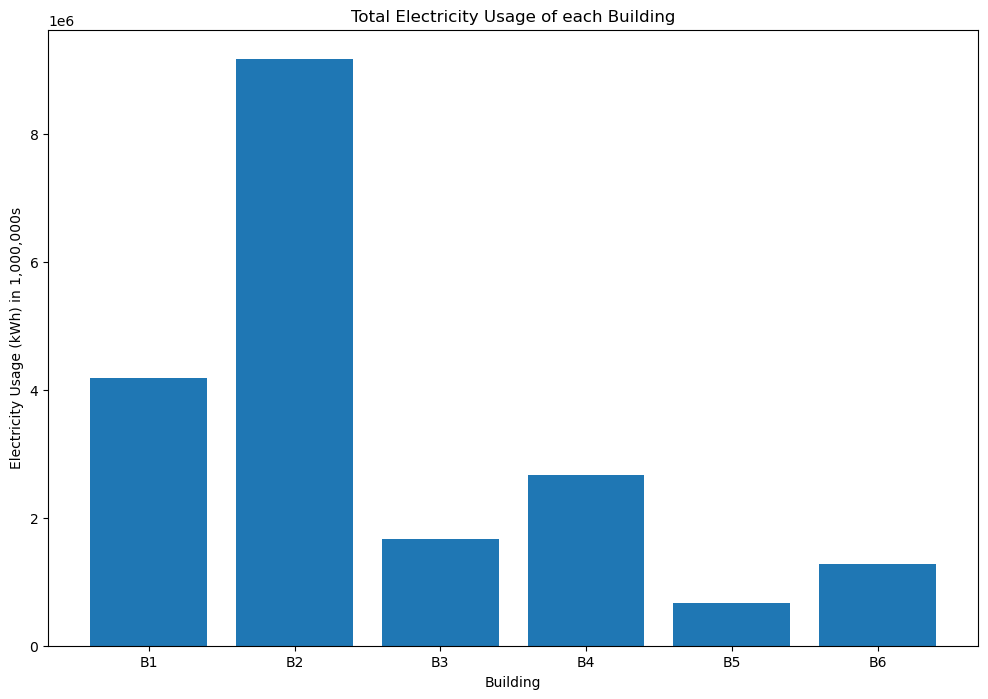

In [16]:
# Solution for 1.
data_2019 = data[data["Year"] == 2019]
totals_2019 = data_2019.groupby("Building").sum().reset_index()
fig = plt.figure()
plt.bar(x = totals_2019["Building"], height = totals_2019["Electricity (kWh)"])
plt.title("Total Electricity Usage of each Building")
plt.xlabel("Building")
plt.ylabel("Electricity Usage (kWh) in 1,000,000s")
fig.set_size_inches(12,8)
display(totals_2019)

**Analysis**: Building B2 is the largest consumer of electricity, followed by B1. Buildings B3-B6 consume around 500,000-2,000,000 kWh of electricity.

**2) Total energy usage per building for the entire year**

/tmp/ipykernel_57/2224678100.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  only_energy_2019["Total"] = only_energy_2019.sum(axis=1)
/tmp/ipykernel_57/2224678100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_energy_2019["Total"] = only_energy_2019.sum(axis=1)


,Building,Chilled Water (kWh),Cooling (kWh),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh),Total
0,B1,0.00,2096380.94,4178192.04,3385556.90,0.00,1559076.27,11219206.15
1,B2,0.00,1860480.26,9172640.37,8684276.23,0.00,501003.06,20218399.92
2,B3,1179947.53,0.00,1669895.96,0.00,3349149.83,0.00,6198993.32
3,B4,626678.74,0.00,2668782.35,0.00,2455943.66,0.00,5751404.75
4,B5,320132.60,0.00,671564.38,0.00,690147.78,0.00,1681844.76
5,B6,299208.80,0.00,1277728.52,0.00,4892653.84,41608.35,6511199.51


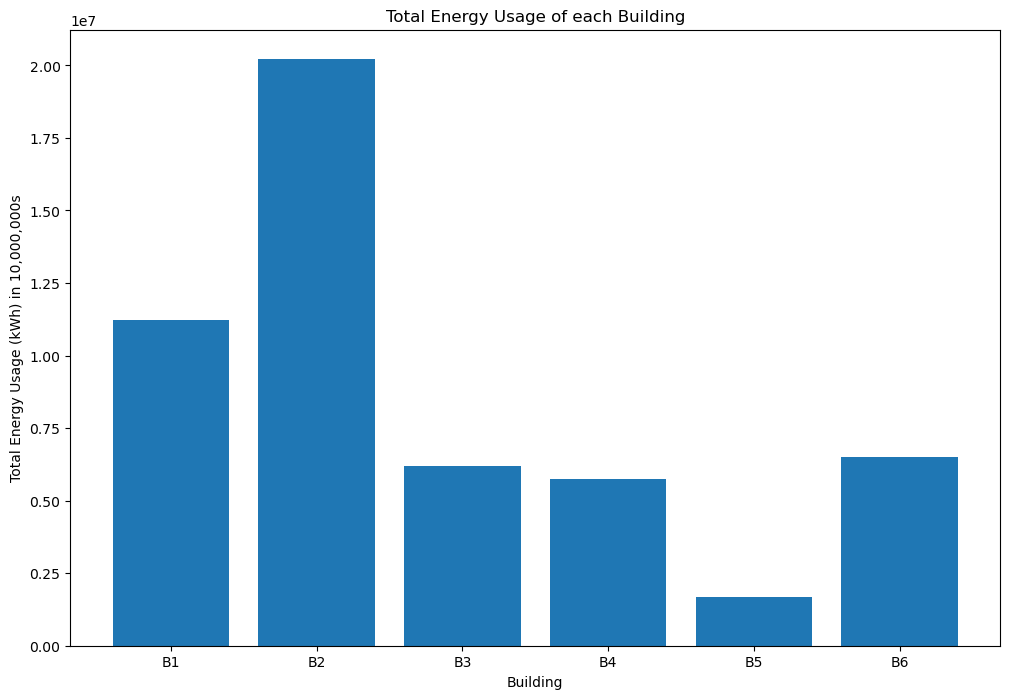

In [17]:
# Solution for 2.

only_energy_2019 = totals_2019[["Building", "Chilled Water (kWh)", "Cooling (kWh)", "Electricity (kWh)", "Heating (kWh)", "Heating Water (kWh)", "Natural Gas (kWh)"]]
only_energy_2019["Total"] = only_energy_2019.sum(axis=1)
fig = plt.figure()
plt.bar(x = only_energy_2019["Building"], height = only_energy_2019["Total"])
plt.title("Total Energy Usage of each Building")
plt.xlabel("Building")
plt.ylabel("Total Energy Usage (kWh) in 10,000,000s")
fig.set_size_inches(12,8)
display(only_energy_2019)

**Analysis**: Building B2 is also the largest consumer of all energy in 2019. Building B5 is now clearly the lowest consumer of energy in 2019.

**3) Box plots showing the daily energy usage per month**

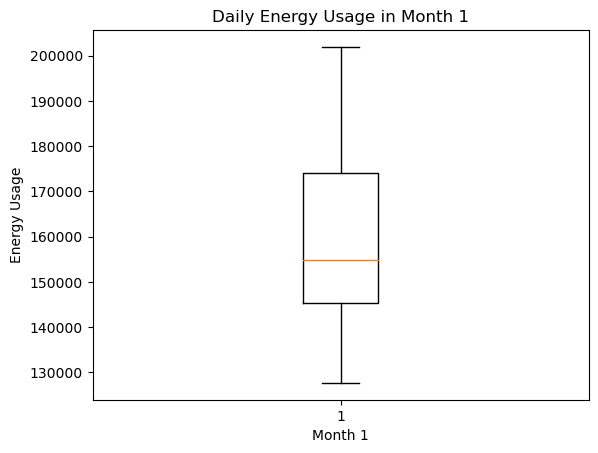

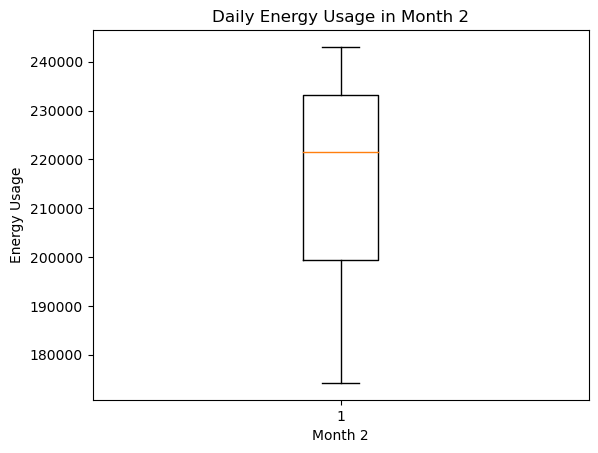

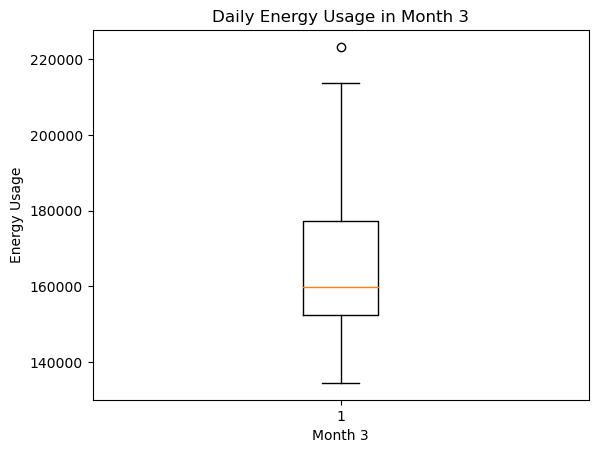

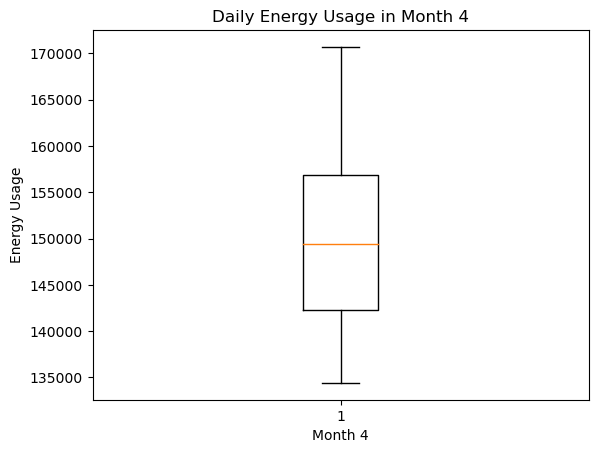

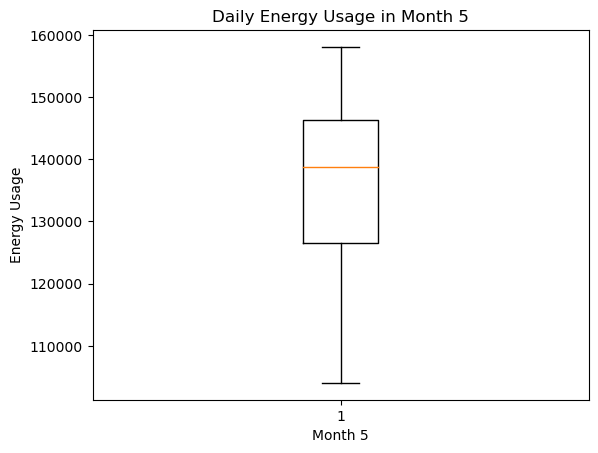

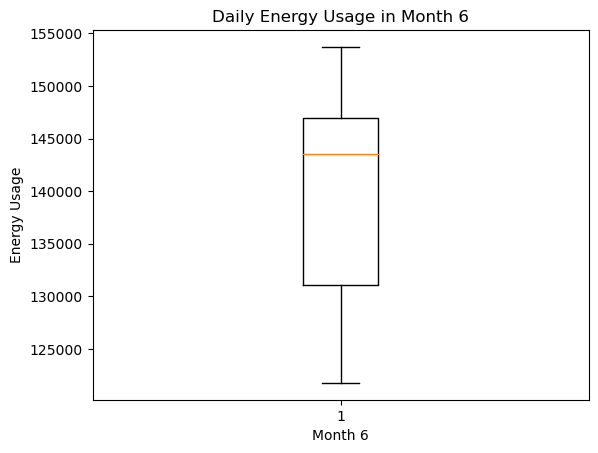

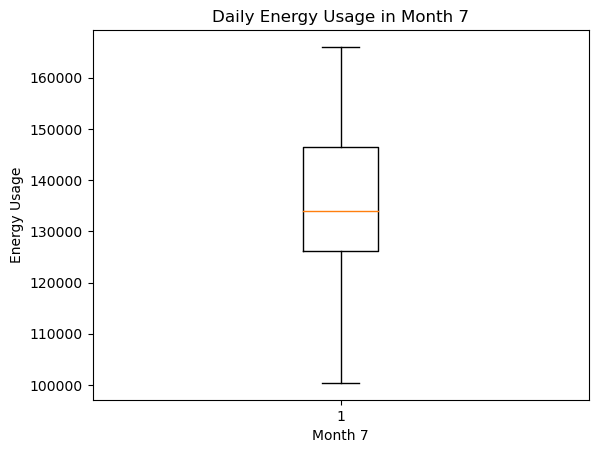

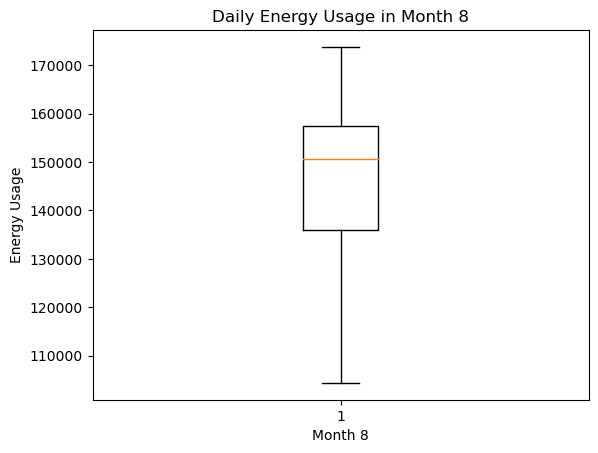

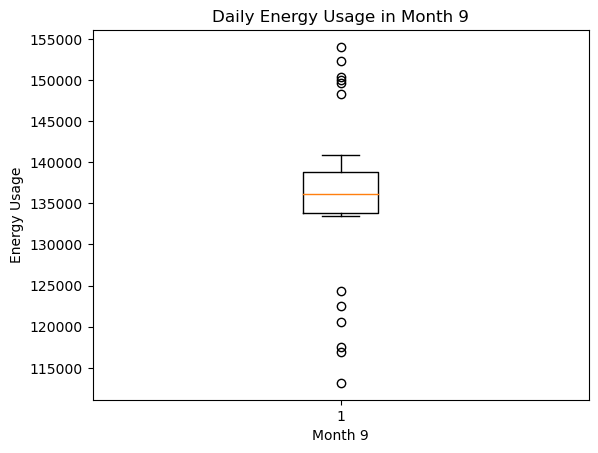

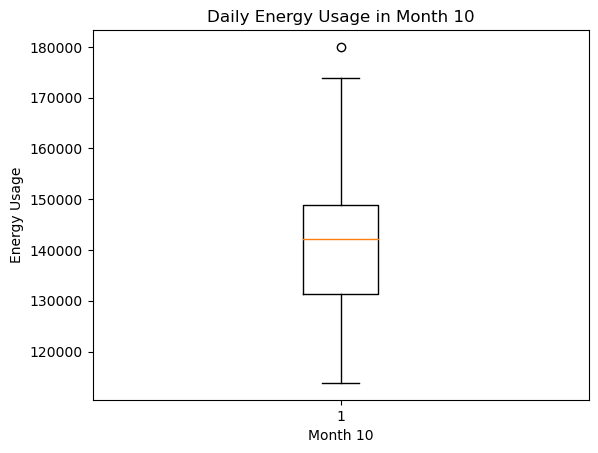

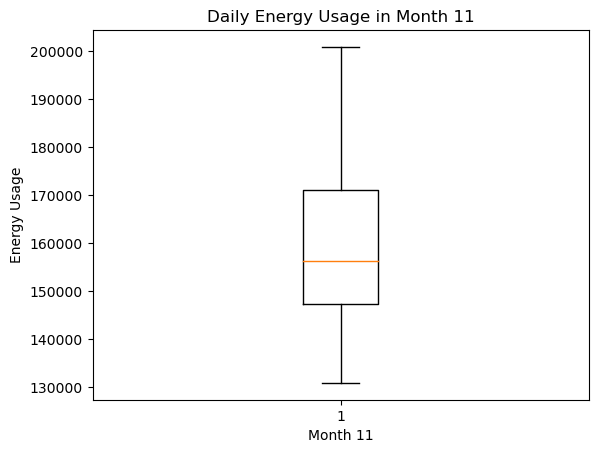

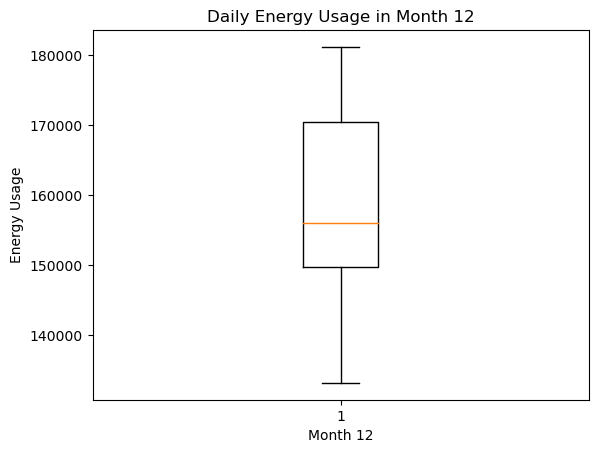

In [18]:
# Solution for 3.
monthly_totals = data_2019.groupby(["Month", "Day"]).sum().reset_index()
monthly_totals["Total"] = monthly_totals.sum(axis=1)
for i in monthly_totals["Month"].unique():
    plt.boxplot(monthly_totals[monthly_totals["Month"] == i]["Total"])
    plt.title("Daily Energy Usage in Month " + str(i))
    plt.xlabel("Month " + str(i))
    plt.ylabel("Energy Usage")
    plt.show()

**Interesting find:** Month 9 is one of the only months with outliers present in it's boxplot. There are approx. 11-12 outliers in month 9.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 3

### Exploring trends over time

You may approach this task however you see fit. We expect appropriate use of visualizations and summary statistics, and textual explanations of your approach and findings following your code.

Consider the energy usage for each building over the entire timeframe available. Address the following questions:
- How does use of natural gas and electricity compare between buildings? Comment on magnitude and variance of usage.
- Can you identify any impacts of the pandemic on energy usage? Reflect on why/why not.

**1) Natural Gas vs Electricity Between Buildings**

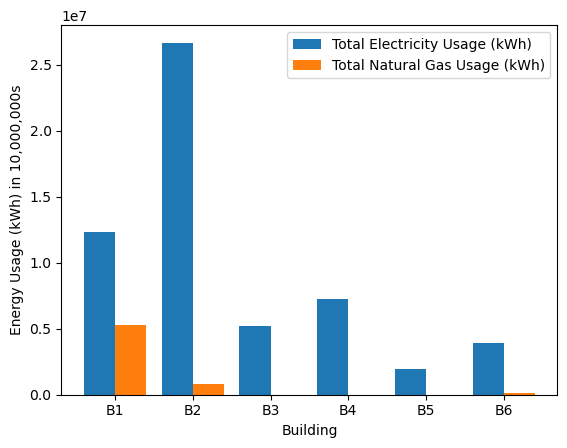

In [19]:
# Solution for 1.
building_groups = data.groupby("Building").sum().reset_index()
X_axis = np.arange(len(building_groups["Building"]))
plt.bar(X_axis - 0.2, building_groups["Electricity (kWh)"] ,0.4,  label = "Total Electricity Usage (kWh)")
plt.bar(X_axis+0.2, building_groups["Natural Gas (kWh)"],0.4,  label = "Total Natural Gas Usage (kWh)")
plt.xticks(X_axis, building_groups["Building"])
plt.xlabel("Building")
plt.ylabel("Energy Usage (kWh) in 10,000,000s")
plt.legend()

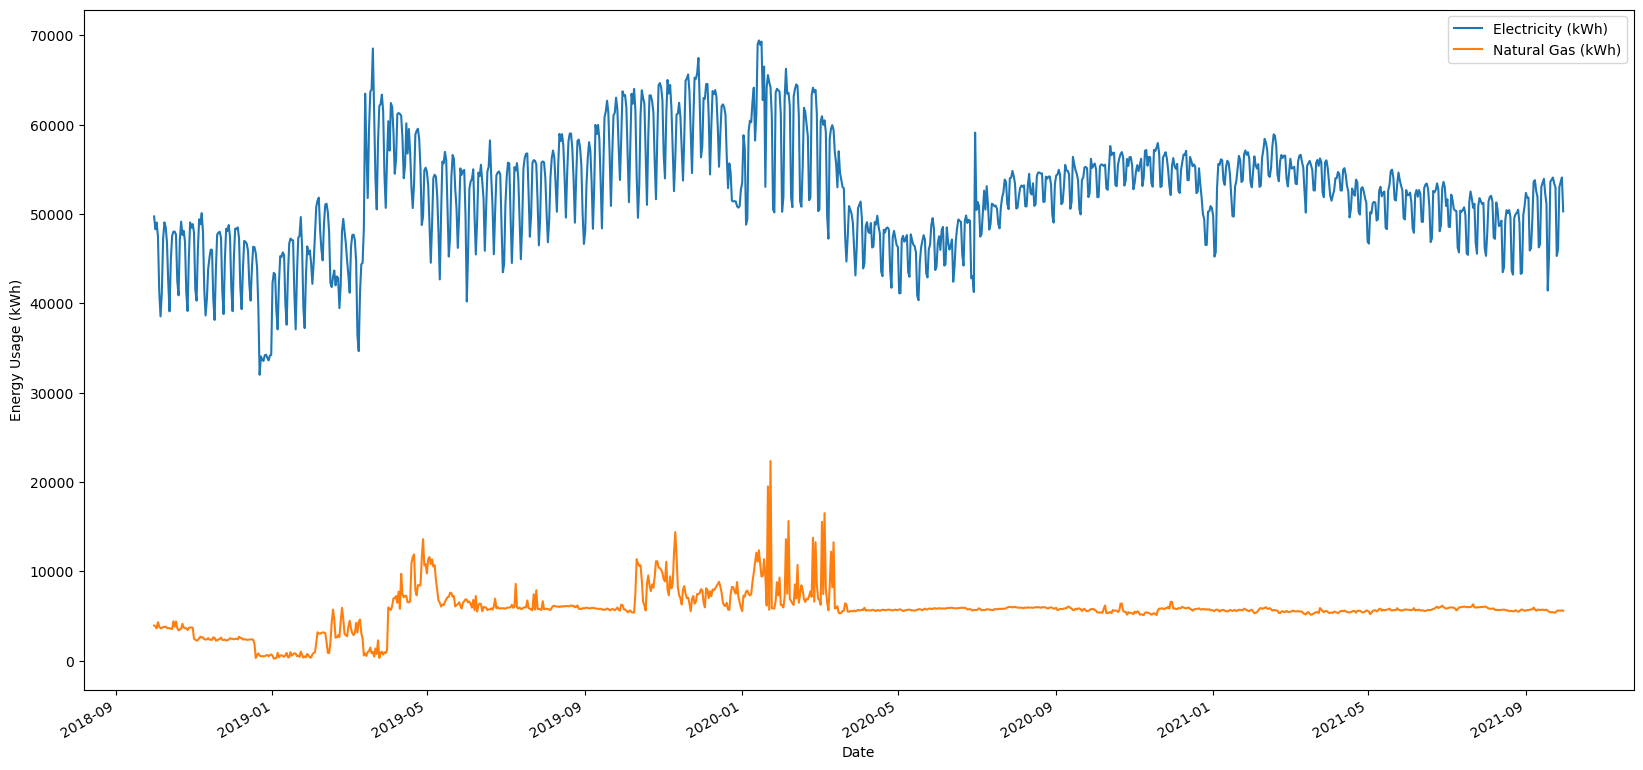

In [38]:
time_data = data.groupby(["Date"]).sum().reset_index()

fig = plt.figure()
plt.plot(time_data["Date"], time_data["Electricity (kWh)"], label = "Electricity (kWh)")
plt.plot(time_data["Date"], time_data["Natural Gas (kWh)"], label = "Natural Gas (kWh)")
plt.xlabel("Date")
plt.ylabel("Energy Usage (kWh)")
plt.legend()
fig.autofmt_xdate()
fig.set_size_inches(20,10)

**Analysis:** 
- Building B2 uses the most electricity during the period by far, while building B1 uses the most nature gas. Besides buildings B1 and B2, natural gas is rarely used with building B3-B5 not using any. Buildings B3-B6's electricity usage seems to be between 5,000,000 kWh and 10,000,000 kWh it total. Building B2 seems to be the largest consumer of energy in terms of electricity and natural gas.
- Natural gas peaks between Jan. 2020 and Apr. 2020, after that natural gas usage is almost constant around 7,500 kWh. There seems to be times in the natural gas usage where it takes "steps" like around Apr. 2019. It seems like this could be regulated by a policy.
- Electricity seems to have a slightly seasonal pattern with higher usage in the winter months.

**2) Effect of the Pandemic on Energy Usage (We will assume the pandemic began around Jan. 1, 2020.)**

/tmp/ipykernel_57/532832647.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  time_data["Total"] = time_data.sum(axis=1)


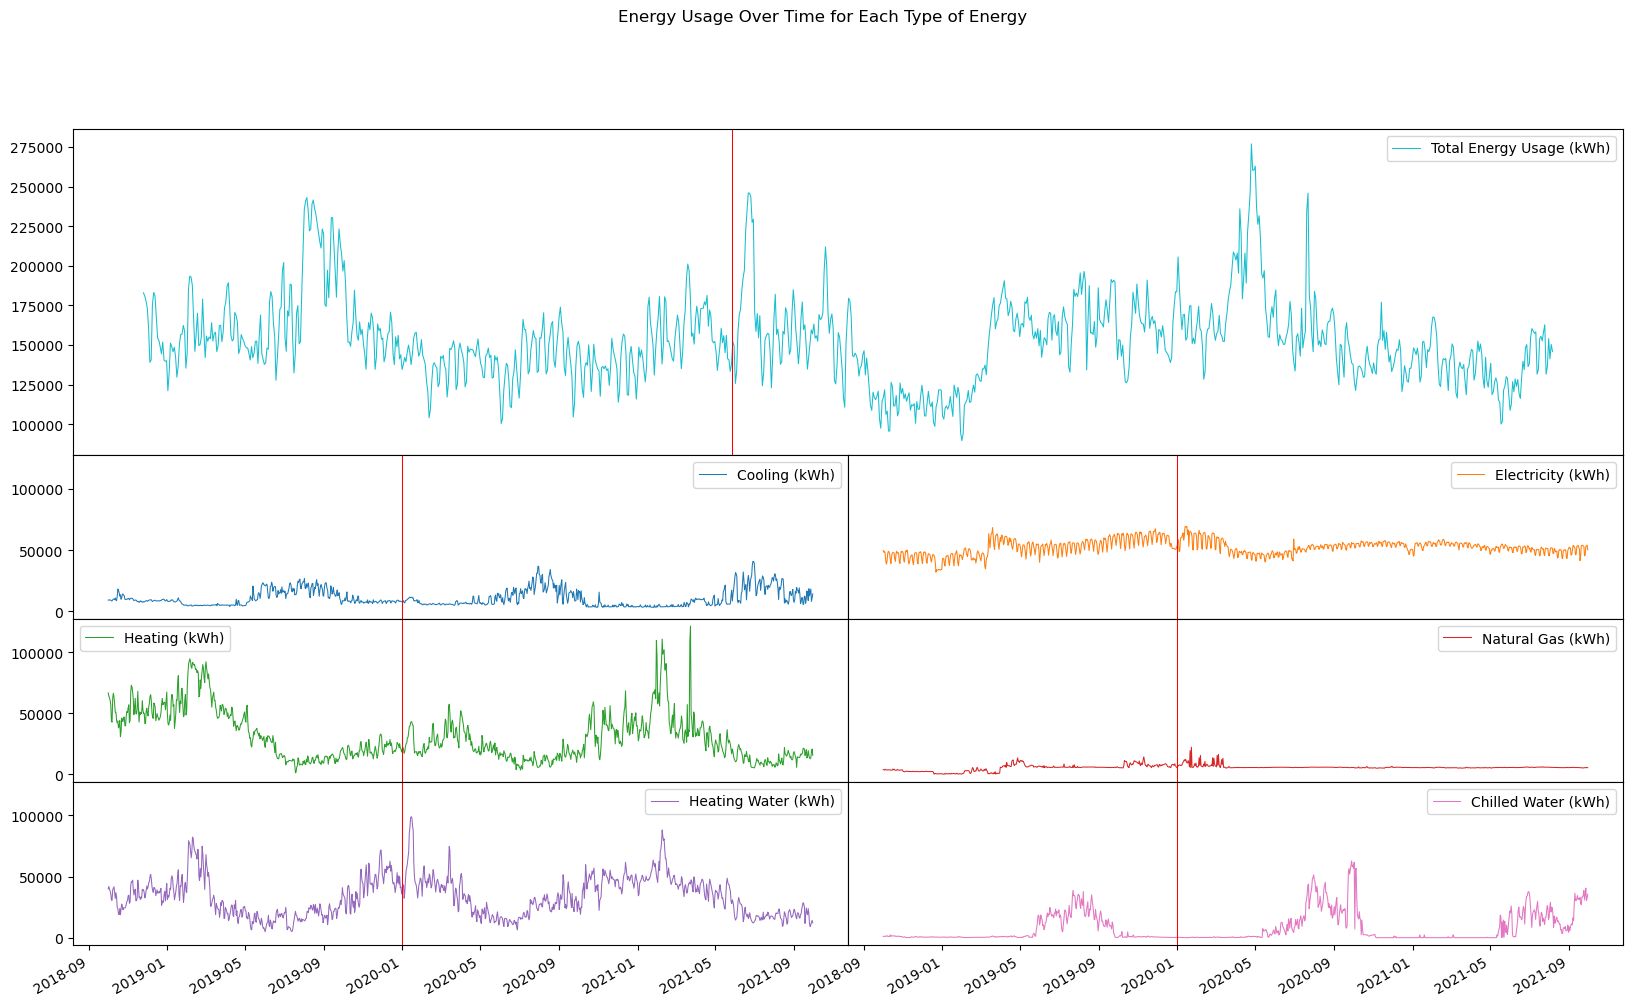

In [39]:
# Solution for 2.
# Make time series plots over entire period. Display when pandemic occured. Do this for total energy, and each seperate energy.
# Comment on magrnitude changes, period averages, period standard deviations.
time_data = data.groupby("Date").sum().reset_index()
time_data["Total"] = time_data.sum(axis=1)

# Initialize the subplot
fig1 = plt.figure()
gs = fig1.add_gridspec(5,2, hspace=0, wspace=0)

# Create the subplots 
main_plot = fig1.add_subplot(gs[0:2, 0:])
ax1= fig1.add_subplot(gs[2,0])
ax2=fig1.add_subplot(gs[2,1], sharex = ax1, sharey = ax1)
ax3=fig1.add_subplot(gs[3,0], sharex = ax1, sharey = ax1)
ax4=fig1.add_subplot(gs[3,1], sharex = ax1, sharey = ax1)
ax5=fig1.add_subplot(gs[4,0], sharex = ax1, sharey = ax1)
ax6=fig1.add_subplot(gs[4,1], sharex = ax1, sharey = ax1)
ax1.axes.xaxis.set_visible(False)

# Plot the data
main_plot.plot(time_data["Date"], time_data["Total"], label = "Total Energy Usage (kWh)", lw = 0.75, color = "tab:cyan")
ax1.plot(time_data["Date"], time_data["Cooling (kWh)"], label = "Cooling (kWh)", lw = 0.75, color = "tab:blue")
ax2.plot(time_data["Date"], time_data["Electricity (kWh)"], label = "Electricity (kWh)", lw = 0.75, color = "tab:orange")
ax3.plot(time_data["Date"], time_data["Heating (kWh)"], label = "Heating (kWh)", lw = 0.75, color = "tab:green")
ax4.plot(time_data["Date"], time_data["Natural Gas (kWh)"], label = "Natural Gas (kWh)", lw = 0.75, color = "tab:red")
ax5.plot(time_data["Date"], time_data["Heating Water (kWh)"], label = "Heating Water (kWh)", lw = 0.75, color = "tab:purple")
ax6.plot(time_data["Date"], time_data["Chilled Water (kWh)"], label = "Chilled Water (kWh)", lw = 0.75, color = "tab:pink")

# Hide y-axis for right most plots in the subplot
ax2.axes.yaxis.set_visible(False)
ax4.axes.yaxis.set_visible(False)
ax6.axes.yaxis.set_visible(False)

# Add legends to each plot
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
main_plot.legend()

fig1.suptitle('Energy Usage Over Time for Each Type of Energy')

# Add red vertical lines to each plot where the pandemic begun 
ax1.axvline(datetime.date(2020, 1, 1), color = "red", lw = 0.75)
ax2.axvline(datetime.date(2020, 1, 1), color = "red", lw = 0.75)
ax3.axvline(datetime.date(2020, 1, 1), color = "red", lw = 0.75)
ax4.axvline(datetime.date(2020, 1, 1), color = "red", lw = 0.75)
ax5.axvline(datetime.date(2020, 1, 1), color = "red", lw = 0.75)
ax6.axvline(datetime.date(2020, 1, 1), color = "red", lw = 0.75)
main_plot.axvline(datetime.date(2020, 1, 1), color = "red", lw = 0.75)

# Format the plot
fig1.autofmt_xdate()
fig1.set_size_inches(20,12)


**Analysis**: 
- The majority of energy uses seems relatively unaffected by the pandemic, however heating and heating water see dip between around March 2020 and the end of 2020. There is also a small decrease in electricity usage during the same time that next recovers during the period of the data. Due to heating and heating water being the most prevalant energy uses in the data, the dip is also noticed in the total energy usage. This is when the University of Calgary moved classes to remote delivery.
- **Note**: There is seasonality in this data, with heating/heating water being the highest in winter months (Sept - April) and cooling/chilled water being highest in summer months (May-Sept). This can make it difficult to attrtibute a trend to something like the pandemic, however, the drop in total energy usage between ~Apr 2020 - Sept 2020 is more significant than previous or future seasons so it does seem like the pandemic had an effect. 

<!-- END QUESTION -->

<!-- END QUESTION -->

